# 一、统计文章二元词组
这篇 文章 https://github.com/AIHackers/DeepLearningStartUp/blob/master/happiness_seg.txt 中，出现频率最高的前 10 个「二元词组」，并输出它们的频率。「二元词组」即文章中所有接连出现的两个词，如「今天 天气 不错」有「今天 天气」，「天气 不错」两个「二元词组」。

In [1]:
from urllib.request import urlopen
from nltk.book import *
import nltk,re,pprint

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
url = r'https://raw.githubusercontent.com/OpenMindClub/DeepLearningStartUp/master/happiness_seg.txt'
raw = urlopen(url).read()
raw = raw.decode('utf-8')
raw[:100]

'\n\n幸福之路\n第一章 \u3000 什么 使人 不幸\n\n\n动物 只要 不患 疾病 ， 食物 充足 ， 就 会 快乐 满足 。 人 也 应该 如此 ； 然而 现实 并非 这样 ， 至少 在 大多数 情况 下 并非'

In [3]:
## 分词并进行数据清洗：标点符号ASCII码：英文标点 u2000-u206f，中文标点 u3000-u303f， 全角 ff00-ffef
spl = re.split(r'[ \t\n\u2000-\u206f\u3000-\u303f\uff00-\uffef]',raw) 
txt = list(filter(lambda x: len(x) > 0 , spl)) 
len(txt)
txt[:10] 

['幸福之路', '第一章', '什么', '使人', '不幸', '动物', '只要', '不患', '疾病', '食物']

In [6]:
## 统计出现的二元词组
from nltk import bigrams
listn = list(bigrams(txt)) 
listn[:10] 

[('幸福之路', '第一章'),
 ('第一章', '什么'),
 ('什么', '使人'),
 ('使人', '不幸'),
 ('不幸', '动物'),
 ('动物', '只要'),
 ('只要', '不患'),
 ('不患', '疾病'),
 ('疾病', '食物'),
 ('食物', '充足')]

In [7]:
# 取前10频率最高词组
Flist2 = FreqDist(listn)
Flist2.most_common(10) 

[(('的', '人'), 930),
 (('他', '的'), 503),
 (('自己', '的'), 480),
 (('上', '的'), 356),
 (('他们', '的'), 335),
 (('人', '的'), 293),
 (('的', '时候'), 261),
 (('就', '会'), 225),
 (('的', '东西'), 207),
 (('都', '是'), 206)]

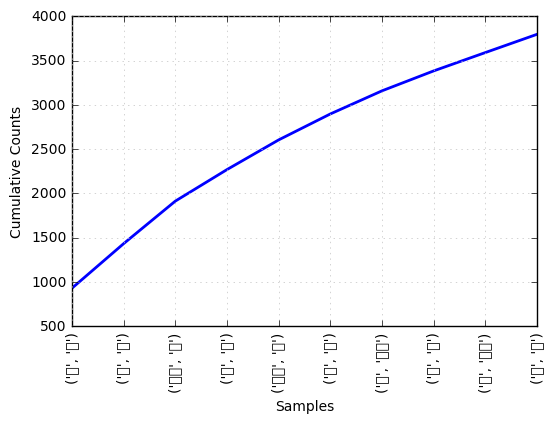

In [8]:
import warnings
Flist2.plot(10,cumulative = True)  ## 画下前10个二元词组的累积词频

# 二、求解以下函数相对 x 的导数：![](https://camo.githubusercontent.com/2a5cf97901e2bac8ab998b1d2b366dcb9d941bfe/687474703a2f2f6f70656e6d696e64636c75622e71696e6975646e2e636f6d2f444c3130315f737461727475707461736b2e706e67)

### 根据函数乘积以及复合函数微分法则，可以有
(sin(x^2)x)‘ = sin(x^2)’x + sin(x^2)
= x[cos(x^2)*2x] + sin(x^2)x
= 2x^2*cos(x^2) + sin(x^2)


In [10]:
from sympy import *
x = Symbol("x")
diff((sin(x*x)*x),x) ## 可知计算结果和sympy一致

2*x**2*cos(x**2) + sin(x**2)

# 三、向量化 (vectorization) 计算是科学计算中必备的技巧。调研 Python 的 numpy 库中「向量化」的概念。熟悉概念之后，使用标准正态分布生成一个 100 元素的数组（以 0 为均值），用向量化方法将这个数组中 < 0 的元素设置成 0 。


In [16]:
import numpy as np
ndarry = np.random.randn(100) + 0
ndarry

array([-1.39052695,  1.38855654, -0.1553699 , -1.08311156,  0.03179826,
       -0.04527021,  2.44048727, -0.66042065, -0.24570409,  0.77444598,
       -1.18313182, -0.37218103, -0.85984346,  1.25886703,  1.83164018,
       -0.60938675, -1.79175613, -0.70943174, -1.74941588, -0.91003033,
        1.01809254,  0.46681903,  0.16384195,  1.46432355, -0.25590266,
       -0.71656473, -0.02654048,  0.25785303, -0.86434282, -0.61132495,
       -0.74430225, -0.70707974,  1.53064592, -0.73548501, -0.79000387,
        1.96965563,  2.38050007, -1.9405981 ,  0.99629593, -0.21652793,
       -0.33557427, -0.57460724, -0.51187222,  1.09913452, -1.84995612,
        0.10352337,  0.25228713, -0.67367151,  0.14217581,  0.07796218,
        0.48553571,  1.39327662,  2.03016599, -0.24839006, -0.2215736 ,
       -0.06192653,  0.74952053,  0.82079353,  1.10985368,  1.2836836 ,
        0.8871327 , -1.75287984, -0.37320949,  0.58945104, -0.38052995,
       -0.53923842, -1.73887577,  0.49976246, -0.38039455, -0.23

In [18]:
ndarry[ndarry < 0] = 0 ## 将 <0 的元素设置为 0
ndarry

array([ 0.        ,  1.38855654,  0.        ,  0.        ,  0.03179826,
        0.        ,  2.44048727,  0.        ,  0.        ,  0.77444598,
        0.        ,  0.        ,  0.        ,  1.25886703,  1.83164018,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.01809254,  0.46681903,  0.16384195,  1.46432355,  0.        ,
        0.        ,  0.        ,  0.25785303,  0.        ,  0.        ,
        0.        ,  0.        ,  1.53064592,  0.        ,  0.        ,
        1.96965563,  2.38050007,  0.        ,  0.99629593,  0.        ,
        0.        ,  0.        ,  0.        ,  1.09913452,  0.        ,
        0.10352337,  0.25228713,  0.        ,  0.14217581,  0.07796218,
        0.48553571,  1.39327662,  2.03016599,  0.        ,  0.        ,
        0.        ,  0.74952053,  0.82079353,  1.10985368,  1.2836836 ,
        0.8871327 ,  0.        ,  0.        ,  0.58945104,  0.        ,
        0.        ,  0.        ,  0.49976246,  0.        ,  0.  